In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

## Jaccard Similarity

In [2]:
a = [0, 1, 2, 3, 3, 3, 4]
b = [7, 6, 5, 4, 4, 3]

a = set(a)
b = set(b)

a, b

({0, 1, 2, 3, 4}, {3, 4, 5, 6, 7})

In [3]:
shared = a.intersection(b)
shared

{3, 4}

In [4]:
total = a.union(b)
total

{0, 1, 2, 3, 4, 5, 6, 7}

In [5]:
len(shared) / len(total)

0.25

In [6]:
a = "his thought process was on so many levels that he gave himself a phobia of heights".split()
b = "there is an art to getting your way and throwing bananas on to the street is not it".split()
c = "it is not often you find soggy bananas on the street".split()

print(a, b, c)

['his', 'thought', 'process', 'was', 'on', 'so', 'many', 'levels', 'that', 'he', 'gave', 'himself', 'a', 'phobia', 'of', 'heights'] ['there', 'is', 'an', 'art', 'to', 'getting', 'your', 'way', 'and', 'throwing', 'bananas', 'on', 'to', 'the', 'street', 'is', 'not', 'it'] ['it', 'is', 'not', 'often', 'you', 'find', 'soggy', 'bananas', 'on', 'the', 'street']


In [7]:
a = set(a)
b = set(b)
c = set(c)

print(c)

{'the', 'on', 'find', 'is', 'street', 'soggy', 'not', 'often', 'bananas', 'it', 'you'}


In [8]:
def jac(x: set, y: set):
    shared = x.intersection(y) 
    return len(shared) / len(x.union(y)) 

In [9]:
jac(b, c)

0.35

## w-Shingling

In [10]:
a = "his thought process was on so many levels that he gave himself a phobia of heights".split()
b = "there is an art to getting your way and throwing bananas on to the street is not it".split()
c = "it is not often you find soggy bananas on the street".split()

In [11]:
a_shingle = set([' '.join([a[i], a[i + 1]]) for i in range(len(a)) if i != len(a) - 1])
b_shingle = set([' '.join([b[i], b[i + 1]]) for i in range(len(b)) if i != len(b) - 1])
c_shingle = set([' '.join([c[i], c[i + 1]]) for i in range(len(c)) if i != len(c) - 1])
print(a_shingle)

{'his thought', 'levels that', 'he gave', 'process was', 'on so', 'of heights', 'so many', 'many levels', 'phobia of', 'was on', 'a phobia', 'thought process', 'that he', 'gave himself', 'himself a'}


In [12]:
jac(a_shingle, b_shingle)

0.0

In [13]:
jac(b_shingle, c_shingle)

0.125

In [14]:
b_shingle.intersection(c_shingle)

{'bananas on', 'is not', 'the street'}

## Levenshtein Distance

![](https://d33wubrfki0l68.cloudfront.net/921d8acd374fd30cb7188e2622b27ce886f9653e/cbdcf/images/semantic-search-3.png)

In [15]:
a = ' Levenshtein'
b = ' Livinshten' 

In [16]:
lev = np.zeros((len(a), len(b)))
lev

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [17]:
for i in range(len(a)):
    for j in range(len(b)):
        if min([i, j]) == 0:
            lev[i, j] = max([i, j])
lev

array([[ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.],
       [ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 2.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 3.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 4.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 5.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 6.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 7.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 8.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 9.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [10.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [11.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]])

In [18]:
for i in range(len(a)):
    for j in range(len(b)):
        if min([i, j]) == 0:
            lev[i, j] = max([i, j])
        else:
            x = lev[i - 1, j]  
            y = lev[i, j - 1]  
            z = lev[i - 1, j - 1]
            lev[i, j] = min([x, y, z])
            if a[i] != b[j]:
                lev[i, j] += 1
lev

array([[ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.],
       [ 1.,  0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9.],
       [ 2.,  1.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  7.,  8.],
       [ 3.,  2.,  2.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.],
       [ 4.,  3.,  3.,  2.,  2.,  3.,  4.,  5.,  6.,  6.,  7.],
       [ 5.,  4.,  4.,  3.,  3.,  2.,  3.,  4.,  5.,  6.,  6.],
       [ 6.,  5.,  5.,  4.,  4.,  3.,  2.,  3.,  4.,  5.,  6.],
       [ 7.,  6.,  6.,  5.,  5.,  4.,  3.,  2.,  3.,  4.,  5.],
       [ 8.,  7.,  7.,  6.,  6.,  5.,  4.,  3.,  2.,  3.,  4.],
       [ 9.,  8.,  8.,  7.,  7.,  6.,  5.,  4.,  3.,  2.,  3.],
       [10.,  9.,  8.,  8.,  7.,  7.,  6.,  5.,  4.,  3.,  3.],
       [11., 10.,  9.,  9.,  8.,  7.,  7.,  6.,  5.,  4.,  3.]])

In [19]:
lev[-1, -1]

3.0

## TF-IDF

![](https://d33wubrfki0l68.cloudfront.net/d6e2ea146c9da6e32711b0a925f97d0027e9935c/83b7f/images/semantic-search-10.png)

![](https://d33wubrfki0l68.cloudfront.net/8b01f75b97e0fb3bac30b88c8ad81fbcff9f2b15/1769f/images/semantic-search-11.png)

![](https://d33wubrfki0l68.cloudfront.net/270adb0a0e4e7e9e7b1125e4338088525d372b55/b2672/images/semantic-search-12.png)

In [20]:
a = "purple is the best city in the forest".split()
b = "there is an art to getting your way and throwing bananas on to the street is not it".split()
c = "it is not often you find soggy bananas on the street".split()

In [21]:
def tfidf(word):
    tf = []
    count_n = 0
    for sentence in [a, b, c]:
        t_count = len([x for x in sentence if word in sentence])
        tf.append(t_count / len(sentence))
        count_n += 1 if word in sentence else 0
    idf = np.log10(len([a, b, c]) / count_n)
    return [round(_tf * idf, 2) for _tf in tf]

In [22]:
tfidf_a, tfidf_b, tfidf_c = tfidf('forest')
print(f"TF-IDF a: {tfidf_a}\nTF-IDF b: {tfidf_b}\nTF-IDF c: {tfidf_c}")

TF-IDF a: 0.48
TF-IDF b: 0.0
TF-IDF c: 0.0


In [23]:
vocab = set(a + b + c)

In [24]:
print(vocab)

{'way', 'forest', 'is', 'the', 'your', 'on', 'to', 'it', 'find', 'in', 'city', 'best', 'there', 'and', 'not', 'soggy', 'bananas', 'you', 'purple', 'an', 'throwing', 'street', 'getting', 'art', 'often'}


In [25]:
vec_a = []
vec_b = []
vec_c = []

for word in vocab:
    tfidf_a, tfidf_b, tfidf_c = tfidf(word)
    vec_a.append(tfidf_a)
    vec_b.append(tfidf_b)
    vec_c.append(tfidf_c)

print(vec_a)

[0.0, 0.48, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.48, 0.48, 0.48, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.48, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


## BM25

![](https://d33wubrfki0l68.cloudfront.net/4e4e1e379d5d3addcd44142b9b1a5f19a7e6d40a/bf07e/images/semantic-search-15.png)

In [26]:
a = "purple is the best city in the forest".split()
b = "there is an art to getting your way and throwing bananas on to the street is not it".split()
c = "it is not often you find soggy bananas on the street".split()
d = "green should have smelled more tranquil but somehow it just tasted rotten".split()
e = "joyce enjoyed eating pancakes with ketchup".split()
f = "as the asteroid hurtled toward earth becky was upset her dentist appointment had been canceled".split()

In [27]:
docs = [a, b, c, d, e, f]

In [28]:
avgdl = sum(len(sentence) for sentence in [a, b, c, d, e, f]) / len(docs)
N = len(docs)

def bm25(word, sentence, k=1.2, b=0.75):
    freq = sentence.count(word)  # or f(q,D) - freq of query in Doc
    tf = (freq * (k + 1)) / (freq + k * (1 - b + b * (len(sentence) / avgdl)))
    N_q = sum([doc.count(word) for doc in docs])  # number of docs that contain the word
    idf = np.log(((N - N_q + 0.5) / (N_q + 0.5)) + 1)
    return round(tf * idf, 4)

In [29]:
bm25('purple', a)

1.7677

In [30]:
vocab = set(a + b + c + d + e + f)
print(vocab)

{'way', 'was', 'becky', 'forest', 'is', 'have', 'just', 'been', 'rotten', 'as', 'the', 'earth', 'canceled', 'your', 'on', 'to', 'tasted', 'ketchup', 'somehow', 'tranquil', 'had', 'enjoyed', 'but', 'upset', 'it', 'eating', 'pancakes', 'more', 'hurtled', 'find', 'in', 'city', 'best', 'there', 'and', 'her', 'asteroid', 'not', 'toward', 'dentist', 'soggy', 'should', 'bananas', 'appointment', 'you', 'with', 'joyce', 'purple', 'green', 'smelled', 'an', 'throwing', 'street', 'getting', 'art', 'often'}


In [31]:
vec = []
for word in vocab:
    vec.append(bm25(word, a))
print(vec)

[0.0, 0.0, 0.0, 1.7677, 0.507, 0.0, 0.0, 0.0, 0.0, 0.0, 0.3638, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.7677, 1.7677, 1.7677, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.7677, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


## BERT

In [32]:
a = "purple is the best city in the forest"
b = "there is an art to getting your way and throwing bananas on to the street is not it"  # this is very similar to 'g'
c = "it is not often you find soggy bananas on the street"
d = "green should have smelled more tranquil but somehow it just tasted rotten"
e = "joyce enjoyed eating pancakes with ketchup"
f = "as the asteroid hurtled toward earth becky was upset her dentist appointment had been canceled"
g = "to get your way you must not bombard the road with yellow fruit"  # this is very similar to 'b'

In [33]:
from transformers import AutoTokenizer, AutoModel
import torch

In [34]:
tokenizer = AutoTokenizer.from_pretrained('sentence-transformers/bert-base-nli-mean-tokens')
model = AutoModel.from_pretrained('sentence-transformers/bert-base-nli-mean-tokens')

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [35]:
tokens = tokenizer(
    [a, b, c, d, e, f, g],
    max_length=128,
    truncation=True,
    padding='max_length',
    return_tensors='pt'
)

In [36]:
tokens.keys()

dict_keys(['input_ids', 'token_type_ids', 'attention_mask'])

In [37]:
outputs = model(**tokens)
outputs.keys()

odict_keys(['last_hidden_state', 'pooler_output'])

In [38]:
embeddings = outputs.last_hidden_state
embeddings[0]

tensor([[-0.6239, -0.2058,  0.0411,  ...,  0.1490,  0.5681,  0.2381],
        [-0.3694, -0.1485,  0.3780,  ...,  0.4204,  0.5553,  0.1441],
        [-0.7221, -0.3813,  0.2031,  ...,  0.0761,  0.5162,  0.2813],
        ...,
        [-0.1894, -0.3711,  0.3034,  ...,  0.1536,  0.3265,  0.1376],
        [-0.2496, -0.5227,  0.2341,  ...,  0.3419,  0.3164,  0.0256],
        [-0.3311, -0.4430,  0.3492,  ...,  0.3655,  0.2910,  0.0728]],
       grad_fn=<SelectBackward0>)

In [39]:
embeddings[0].shape

torch.Size([128, 768])

In [40]:
mask = tokens['attention_mask'].unsqueeze(-1).expand(embeddings.size()).float()
mask.shape

torch.Size([7, 128, 768])

In [41]:
mask[0]

tensor([[1., 1., 1.,  ..., 1., 1., 1.],
        [1., 1., 1.,  ..., 1., 1., 1.],
        [1., 1., 1.,  ..., 1., 1., 1.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])

In [42]:
masked_embeddings = embeddings * mask
masked_embeddings[0]

tensor([[-0.6239, -0.2058,  0.0411,  ...,  0.1490,  0.5681,  0.2381],
        [-0.3694, -0.1485,  0.3780,  ...,  0.4204,  0.5553,  0.1441],
        [-0.7221, -0.3813,  0.2031,  ...,  0.0761,  0.5162,  0.2813],
        ...,
        [-0.0000, -0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        [-0.0000, -0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        [-0.0000, -0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000]],
       grad_fn=<SelectBackward0>)

In [43]:
summed = torch.sum(masked_embeddings, 1)
summed.shape

torch.Size([7, 768])

In [44]:
counted = torch.clamp(mask.sum(1), min=1e-9)
counted.shape

torch.Size([7, 768])

In [45]:
mean_pooled = summed / counted
mean_pooled.shape

torch.Size([7, 768])

In [46]:
from sklearn.metrics.pairwise import cosine_similarity

mean_pooled = mean_pooled.detach().numpy()

scores = np.zeros((mean_pooled.shape[0], mean_pooled.shape[0]))
for i in range(mean_pooled.shape[0]):
    scores[i, :] = cosine_similarity(
        [mean_pooled[i]],
        mean_pooled
    )[0]

In [47]:
scores

array([[ 1.        ,  0.18692762,  0.28297698,  0.29628253,  0.27451006,
         0.10176265,  0.21696277],
       [ 0.18692762,  1.00000012,  0.72058785,  0.51428944,  0.11749654,
         0.19306943,  0.66182357],
       [ 0.28297698,  0.72058785,  1.        ,  0.4886443 ,  0.23568963,
         0.1715714 ,  0.5599308 ],
       [ 0.29628253,  0.51428944,  0.4886443 ,  0.99999982,  0.26985499,
         0.37889439,  0.52388823],
       [ 0.27451009,  0.11749656,  0.2356896 ,  0.26985499,  1.        ,
         0.23422129, -0.01599769],
       [ 0.10176265,  0.19306944,  0.1715714 ,  0.37889427,  0.23422129,
         1.00000036,  0.2231968 ],
       [ 0.21696277,  0.66182363,  0.5599308 ,  0.52388823, -0.01599769,
         0.22319682,  1.        ]])

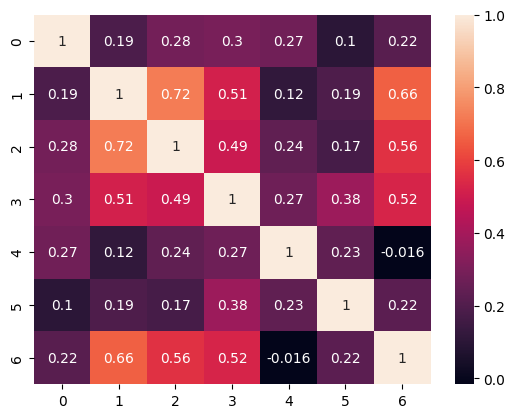

In [48]:
import seaborn as sns 
import matplotlib.pyplot as plt 

sns.heatmap(scores, annot=True)
plt.show()

## SBERT

In [49]:
!pip install sentence_transformers

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.0/86.0 kB 2.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... - \ done
  Created wheel for sentence_transformers: filename=sentence_transformers-2.2.2-py3-none-any.whl size=125938 sha256=c1e77f643f1de4e92d2766fe5e1ca8fdbc932ba98aff20e843047376724c7f7c
  Stored in directory: /root/.cache/pip/wheels/62/f2/10/1e606fd5f02395388f74e7462910fe851042f97238cbbd902f
Successfully built sentence_transformers


In [50]:
from sentence_transformers import SentenceTransformer

model = SentenceTransformer('bert-base-nli-mean-tokens')

In [51]:
sentence_embeddings = model.encode([a, b, c, d, e, f, g])

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

In [52]:
sentence_embeddings.shape

(7, 768)

In [53]:
scores = np.zeros((sentence_embeddings.shape[0], sentence_embeddings.shape[0]))
for i in range(sentence_embeddings.shape[0]):
    scores[i, :] = cosine_similarity(
        [sentence_embeddings[i]],
        sentence_embeddings
    )[0]

In [54]:
scores

array([[ 1.        ,  0.18692765,  0.28297698,  0.29628253,  0.27451006,
         0.10176267,  0.21696277],
       [ 0.18692765,  1.00000012,  0.72058779,  0.51428944,  0.11749658,
         0.19306943,  0.66182345],
       [ 0.28297698,  0.72058779,  1.        ,  0.4886443 ,  0.23568963,
         0.1715714 ,  0.5599308 ],
       [ 0.29628253,  0.51428944,  0.4886443 ,  0.99999982,  0.26985499,
         0.37889433,  0.52388823],
       [ 0.27451009,  0.11749659,  0.2356896 ,  0.26985499,  1.        ,
         0.23422128, -0.01599769],
       [ 0.10176267,  0.19306943,  0.17157137,  0.37889427,  0.23422128,
         1.        ,  0.22319682],
       [ 0.21696277,  0.66182345,  0.5599308 ,  0.52388823, -0.01599769,
         0.22319685,  1.        ]])

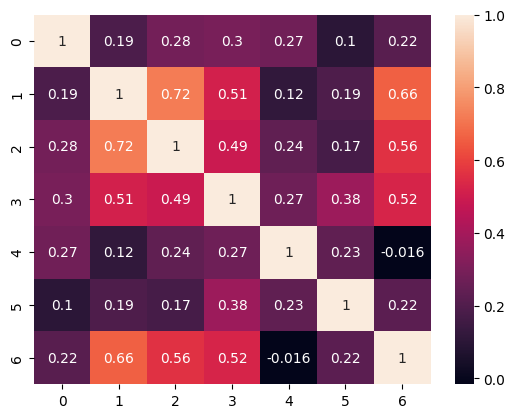

In [55]:
sns.heatmap(scores, annot=True)
plt.show()